In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from ipywidgets import widgets
import os
import plotly 
# plotly.tools.set_credentials_file(username='anjgrg98', api_key='j2GJ3FbQpYIbv8BcODz3')
# import plotly.plotly as py
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
# init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [108]:
 data = pd.read_csv("/home/anjali/06/AMP-1/datasets/features_m.csv")
X=data.iloc[:, 1:139]
y= data.iloc[:, -2]

# X=np.nan_to_num(X)
# y=np.nan_to_num(y)

for col in X.keys():
    X[col].fillna(0, inplace=True)
    
y=pd.factorize(y)[0]

print(X)

          aindex  autocovariance  autocorrelation   BLOSUM1   BLOSUM2  \
0      27.037040       -0.092266        -0.117148  0.209259 -0.081667   
1     170.000000       -0.040694        -0.021750 -0.486667 -0.689167   
2     127.692300       -0.029993        -0.023091 -0.150000 -0.251538   
3     143.529400       -0.003134        -0.002698 -0.111765 -0.347059   
4      50.412370       -0.070462        -0.075575  0.278969 -0.232474   
5      44.615380       -0.057600        -0.080923  0.523077  0.341538   
6     130.476200        0.319814         0.313273 -0.218095 -0.758571   
7      74.285710        0.346452         0.372847 -0.378571 -0.201429   
8      55.714290       -0.228771        -0.240412  0.198095 -0.081429   
9      42.045450       -0.085223        -0.100422  0.169773 -0.081364   
10     67.692310       -0.154008        -0.174241  0.053077 -0.057692   
11    108.888900        0.077393         0.085788  0.155556 -0.327037   
12    108.518500       -0.143002        -0.143934 -

In [109]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

cols1= featureScores.nlargest(10,'Score').Features  #print 10 best features
cols2= featureScores.nlargest(32,'Score').Features  #print 10 best features
cols3= featureScores.nlargest(64,'Score').Features  #print 10 best features

print(len(cols1))
print(list(cols2))
print(list(cols3))


10
['hmoment', 'column_Basic_number', 'column_Charged_number', 'mw', 'lengthpep', 'column_NonPolar_number', 'column_Aliphatic_number', 'column_Polar_number', 'column_tiny_number', 'column_Aromatic_number', 'column_Small_number', 'KF7', 'T3', 'BLOSUM8', 'F5', 'charge', 'ST3', 'VHSE5', 'column_Acidic_number', 'PP3', 'Z5', 'BLOSUM5', 'pI', 'column_Acidic_percentage', 'N_M', 'C_C', 'ProtFP6', 'N_K', 'KF8', 'ST4', 'ST5', 'C_K']
['hmoment', 'column_Basic_number', 'column_Charged_number', 'mw', 'lengthpep', 'column_NonPolar_number', 'column_Aliphatic_number', 'column_Polar_number', 'column_tiny_number', 'column_Aromatic_number', 'column_Small_number', 'KF7', 'T3', 'BLOSUM8', 'F5', 'charge', 'ST3', 'VHSE5', 'column_Acidic_number', 'PP3', 'Z5', 'BLOSUM5', 'pI', 'column_Acidic_percentage', 'N_M', 'C_C', 'ProtFP6', 'N_K', 'KF8', 'ST4', 'ST5', 'C_K', 'VHSE8', 'Z4', 'C_E', 'MSWHIM3', 'BLOSUM10', 'ProtFP3', 'column_Basic_percentage', 'F6', 'N_E', 'BLOSUM1', 'F1', 'instaindex', 'T4', 'KF5', 'N_P', 'K

# Random Forest

In [6]:
X1= data[cols1]
print(X1)

       hmoment  column_Basic_number  column_Charged_number         mw  \
0     0.382254                   10                     14   5948.706   
1     0.433075                    4                      4   1485.919   
2     0.712759                    2                      4   1480.767   
3     0.602363                    3                      4   1739.091   
4     0.757501                   12                     20  10587.770   
5     0.259329                    4                      4   1265.313   
6     0.308044                    0                      1   2111.507   
7     0.280637                    0                      1   2185.533   
8     0.544826                    5                      5   2535.978   
9     0.547665                    6                     10   4790.347   
10    0.828233                    6                      6   2985.584   
11    0.603456                    4                      5   2581.998   
12    0.598764                    4                

In [7]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [15]:

for col in X1.keys():
    X1[col].fillna(0, inplace=True)

X_train, X_test, y_train, y_test= train_test_split(X1,y, random_state=0)



# Feature Scaling

sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)



In [16]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier


In [17]:
rf_model= RandomForestClassifier(n_estimators= 1000, max_features= "sqrt")

rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
rf_pred= rf_model.predict(X_test)
print(rf_pred)


rf_probs= rf_model.predict_proba(X_test)
print(rf_probs)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [19]:
# Confusion Matrix

rf_conf= confusion_matrix(y_test, rf_pred)
print(rf_conf)

rf_f1= f1_score(y_test, rf_pred)
print(rf_f1)

[[598  43]
 [ 74 112]]
0.656891495601173


In [20]:
# Accuracy Score

rf_acc= accuracy_score(y_test, rf_pred)
print(rf_acc)

0.8585247883917775


In [21]:
X2= data[cols2]

for col in X2.keys():
    X2[col].fillna(0, inplace=True)
    
X_train, X_test, y_train, y_test= train_test_split(X2,y, random_state=0)

# Feature Scaling

sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)


rf_model.fit(X_train, y_train)

rf_pred= rf_model.predict(X_test)
rf_probs= rf_model.predict_proba(X_test)

# Confusion Matrix

rf_conf= confusion_matrix(y_test, rf_pred)
print(rf_conf)

rf_f1= f1_score(y_test, rf_pred)
print(rf_f1)

# Accuracy Score

rf_acc= accuracy_score(y_test, rf_pred)
print(rf_acc)

[[607  34]
 [ 56 130]]
0.7428571428571429
0.8911729141475212


In [22]:
X3= data[cols3]

for col in X3.keys():
    X3[col].fillna(0, inplace=True)
    
X_train, X_test, y_train, y_test= train_test_split(X3,y, random_state=0)

# Feature Scaling

sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)


rf_model.fit(X_train, y_train)

rf_pred= rf_model.predict(X_test)
rf_probs= rf_model.predict_proba(X_test)

# Confusion Matrix

rf_conf= confusion_matrix(y_test, rf_pred)
print(rf_conf)

rf_f1= f1_score(y_test, rf_pred)
print(rf_f1)

# Accuracy Score

rf_acc= accuracy_score(y_test, rf_pred)
print(rf_acc)

[[611  30]
 [ 66 120]]
0.7142857142857142
0.8839177750906893


In [23]:
cols4= featureScores.nlargest(48,'Score').Features  #print 10 best features
X4= data[cols4]

for col in X4.keys():
    X4[col].fillna(0, inplace=True)
    
X_train, X_test, y_train, y_test= train_test_split(X4,y, random_state=0)

# Feature Scaling

sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)


rf_model.fit(X_train, y_train)

rf_pred= rf_model.predict(X_test)
rf_probs= rf_model.predict_proba(X_test)

# Confusion Matrix

rf_conf= confusion_matrix(y_test, rf_pred)
print(rf_conf)

rf_f1= f1_score(y_test, rf_pred)
print(rf_f1)

# Accuracy Score

rf_acc= accuracy_score(y_test, rf_pred)
print(rf_acc)


[[610  31]
 [ 62 124]]
0.7272727272727272
0.8875453446191052


In [24]:
cols5= featureScores.nlargest(38,'Score').Features  #print 10 best features
X5= data[cols5]

for col in X5.keys():
    X5[col].fillna(0, inplace=True)
    
X_train, X_test, y_train, y_test= train_test_split(X5,y, random_state=0)

# Feature Scaling

sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)


rf_model.fit(X_train, y_train)

rf_pred= rf_model.predict(X_test)
rf_probs= rf_model.predict_proba(X_test)

# Confusion Matrix

rf_conf= confusion_matrix(y_test, rf_pred)
print(rf_conf)

rf_f1= f1_score(y_test, rf_pred)
print(rf_f1)

# Accuracy Score

rf_acc= accuracy_score(y_test, rf_pred)
print(rf_acc)

[[608  33]
 [ 66 120]]
0.7079646017699115
0.8802902055622733


In [110]:
rf_acc= list()
for i in range(32, 65):
    cols= featureScores.nlargest(i,'Score').Features  #print i best features
    X= data[cols]

    for col in X.keys():
        X[col].fillna(0, inplace=True)

    X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

    # Feature Scaling

    sc_X= StandardScaler()
    X_train= sc_X.fit_transform(X_train)
    X_test= sc_X.transform(X_test)


    rf_model.fit(X_train, y_train)

    rf_pred= rf_model.predict(X_test)
#     rf_probs= rf_model.predict_proba(X_test)

#     # Confusion Matrix

#     rf_conf= confusion_matrix(y_test, rf_pred)
#     print(rf_conf)

#     rf_f1= f1_score(y_test, rf_pred)
#     print(rf_f1)

    # Accuracy Score

    rf_acc.append(accuracy_score(y_test, rf_pred))
#     print(rf_acc)
    


In [111]:
print(rf_acc)

[0.8839177750906893, 0.8863361547762999, 0.8899637243047158, 0.8923821039903265, 0.8851269649334945, 0.8839177750906893, 0.8899637243047158, 0.8911729141475212, 0.8923821039903265, 0.8851269649334945, 0.8875453446191052, 0.8839177750906893, 0.8875453446191052, 0.8839177750906893, 0.8887545344619106, 0.8899637243047158, 0.8935912938331319, 0.8863361547762999, 0.8851269649334945, 0.8899637243047158, 0.8875453446191052, 0.8887545344619106, 0.8911729141475212, 0.8875453446191052, 0.8851269649334945, 0.8863361547762999, 0.8839177750906893, 0.8851269649334945, 0.8887545344619106, 0.8875453446191052, 0.8851269649334945, 0.8875453446191052, 0.8875453446191052]


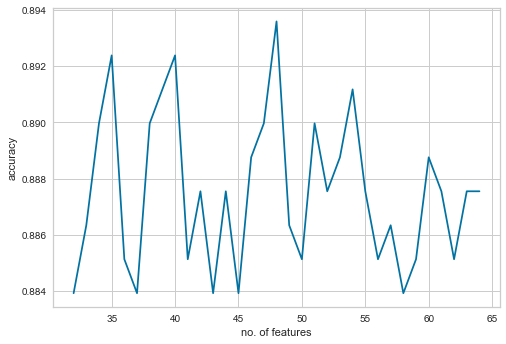

In [112]:
import matplotlib.pyplot as plt
plt.plot(range(32, 65), rf_acc)
plt.xlabel('no. of features')
plt.ylabel('accuracy')
# plt.title('Pakistan India Population till 2010')
plt.show()

In [116]:
rf_acc= list()
for i in range(1, 32):
    cols= featureScores.nlargest(i,'Score').Features  #print 10 best features
    X= data[cols]

    for col in X.keys():
        X[col].fillna(0, inplace=True)

    X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

    # Feature Scaling

    sc_X= StandardScaler()
    X_train= sc_X.fit_transform(X_train)
    X_test= sc_X.transform(X_test)


    rf_model.fit(X_train, y_train)

    rf_pred= rf_model.predict(X_test)
#     rf_probs= rf_model.predict_proba(X_test)

#     # Confusion Matrix

#     rf_conf= confusion_matrix(y_test, rf_pred)
#     print(rf_conf)

#     rf_f1= f1_score(y_test, rf_pred)
#     print(rf_f1)

    # Accuracy Score

    rf_acc.append(accuracy_score(y_test, rf_pred))
#     print(rf_acc)
    


[0.717049576783555, 0.7642079806529625, 0.7642079806529625, 0.81136638452237, 0.8343409915356711, 0.8440145102781137, 0.8500604594921403, 0.8585247883917775, 0.8585247883917775, 0.8597339782345829, 0.8561064087061668, 0.8548972188633616, 0.8500604594921403, 0.8609431680773881, 0.8633615477629988, 0.8694074969770254, 0.8694074969770254, 0.8706166868198307, 0.871825876662636, 0.875453446191052, 0.879081015719468, 0.8730350665054414, 0.875453446191052, 0.8742442563482467, 0.8742442563482467, 0.8766626360338573, 0.8742442563482467, 0.879081015719468, 0.8814993954050786, 0.8827085852478839, 0.8827085852478839]


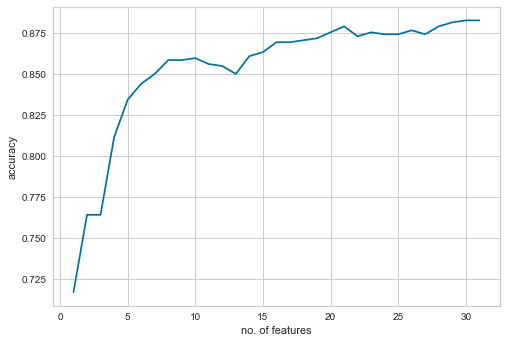

In [117]:
print(rf_acc)

import matplotlib.pyplot as plt
plt.plot(range(1, 32), rf_acc)
plt.xlabel('no. of features')
plt.ylabel('accuracy')
# plt.title('Pakistan India Population till 2010')
plt.show()

In [118]:
rf_acc= list()
for i in range(65, 97):
    cols= featureScores.nlargest(i,'Score').Features  #print 10 best features
    X= data[cols]

    for col in X.keys():
        X[col].fillna(0, inplace=True)

    X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

    # Feature Scaling

    sc_X= StandardScaler()
    X_train= sc_X.fit_transform(X_train)
    X_test= sc_X.transform(X_test)


    rf_model.fit(X_train, y_train)

    rf_pred= rf_model.predict(X_test)
#     rf_probs= rf_model.predict_proba(X_test)

#     # Confusion Matrix

#     rf_conf= confusion_matrix(y_test, rf_pred)
#     print(rf_conf)

#     rf_f1= f1_score(y_test, rf_pred)
#     print(rf_f1)

    # Accuracy Score

    rf_acc.append(accuracy_score(y_test, rf_pred))
#     print(rf_acc)
    


[0.8851269649334945, 0.8851269649334945, 0.8802902055622733, 0.8863361547762999, 0.8887545344619106, 0.8827085852478839, 0.8839177750906893, 0.8863361547762999, 0.8863361547762999, 0.8875453446191052, 0.8887545344619106, 0.8875453446191052, 0.8887545344619106, 0.8923821039903265, 0.8851269649334945, 0.8863361547762999, 0.8887545344619106, 0.8839177750906893, 0.8899637243047158, 0.8899637243047158, 0.8863361547762999, 0.8899637243047158, 0.8887545344619106, 0.8875453446191052, 0.8875453446191052, 0.8875453446191052, 0.8887545344619106, 0.8887545344619106, 0.8887545344619106, 0.8875453446191052, 0.8875453446191052, 0.8814993954050786]


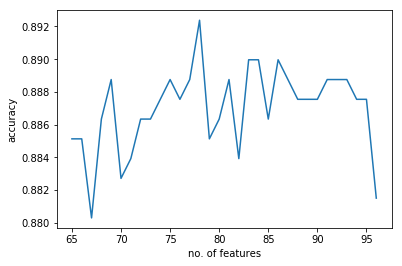

In [44]:
print(rf_acc)

import matplotlib.pyplot as plt
plt.plot(range(65, 97), rf_acc)
plt.xlabel('no. of features')
plt.ylabel('accuracy')
# plt.title('Pakistan India Population till 2010')
plt.show()

# KNN

In [34]:
# to estimate n_neighbors

import math

n_neighbors= math.sqrt(len(y_test))
print(n_neighbors)

28.75760768909681


In [113]:
n_neighbors= 29

knn_model= KNeighborsClassifier(n_neighbors= n_neighbors, metric= "euclidean")
knn_acc= list()

for i in range(32, 65): 
    cols= featureScores.nlargest(i,'Score').Features  #print 10 best features
    X= data[cols]

    for col in X.keys():
        X[col].fillna(0, inplace=True)

    X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

    # Feature Scaling

    sc_X= StandardScaler()
    X_train= sc_X.fit_transform(X_train)
    X_test= sc_X.transform(X_test)

    knn_model.fit(X_train, y_train)

    knn_pred= knn_model.predict(X_test)
#     print(knn_pred)

#     knn_probs= knn_model.predict_proba(X_test)
#     print(knn_probs)

    # Accuracy Score

    knn_acc.append(accuracy_score(y_test, knn_pred))
#     print(knn_acc)

In [114]:
print(knn_acc)

[0.8657799274486094, 0.8657799274486094, 0.8633615477629988, 0.8669891172914147, 0.8657799274486094, 0.8609431680773881, 0.8633615477629988, 0.8681983071342201, 0.8657799274486094, 0.8621523579201935, 0.875453446191052, 0.8742442563482467, 0.871825876662636, 0.8657799274486094, 0.8669891172914147, 0.8681983071342201, 0.8669891172914147, 0.8657799274486094, 0.8706166868198307, 0.8657799274486094, 0.8621523579201935, 0.8621523579201935, 0.8706166868198307, 0.8730350665054414, 0.8657799274486094, 0.8633615477629988, 0.8657799274486094, 0.8681983071342201, 0.8633615477629988, 0.8657799274486094, 0.8597339782345829, 0.8573155985489722, 0.8573155985489722]


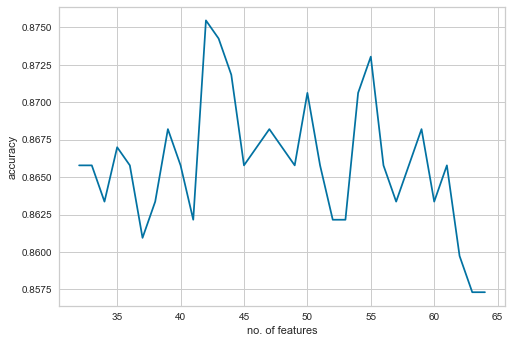

In [115]:
import matplotlib.pyplot as plt
plt.plot(range(32, 65), knn_acc)
plt.xlabel('no. of features')
plt.ylabel('accuracy')
# plt.title('Pakistan India Population till 2010')
plt.show()

In [52]:
cols= featureScores.nlargest(33,'Score').Features  #print 10 best features
X= data[cols]

for col in X.keys():
    X[col].fillna(0, inplace=True)

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

# Feature Scaling

sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

knn_model.fit(X_train, y_train)

knn_pred= knn_model.predict(X_test)
#     print(knn_pred)

knn_probs= knn_model.predict_proba(X_test)
#     print(knn_probs)

rf_conf= confusion_matrix(y_test, rf_pred)
print(rf_conf)

[[612  29]
 [ 69 117]]


In [45]:
for i in range(1, 32): 
    cols= featureScores.nlargest(i,'Score').Features  #print 10 best features
    X= data[cols]

    for col in X.keys():
        X[col].fillna(0, inplace=True)

    X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

    # Feature Scaling

    sc_X= StandardScaler()
    X_train= sc_X.fit_transform(X_train)
    X_test= sc_X.transform(X_test)

    knn_model.fit(X_train, y_train)

    knn_pred= knn_model.predict(X_test)
#     print(knn_pred)

#     knn_probs= knn_model.predict_proba(X_test)
#     print(knn_probs)

    # Accuracy Score

    knn_acc.append(accuracy_score(y_test, knn_pred))
#     print(knn_acc)

[0.8706166868198307, 0.8802902055622733, 0.879081015719468, 0.8742442563482467, 0.875453446191052, 0.871825876662636, 0.8730350665054414, 0.8657799274486094, 0.871825876662636, 0.8706166868198307, 0.8681983071342201, 0.8657799274486094, 0.8597339782345829, 0.8573155985489722, 0.8597339782345829, 0.8597339782345829, 0.8645707376058042, 0.8645707376058042, 0.8645707376058042, 0.8597339782345829, 0.8657799274486094, 0.8561064087061668, 0.8621523579201935, 0.8585247883917775, 0.8561064087061668, 0.8536880290205562, 0.8585247883917775, 0.8536880290205562, 0.8585247883917775, 0.8585247883917775, 0.8585247883917775, 0.8609431680773881, 0.8536880290205562, 0.7956469165659008, 0.8041112454655381, 0.8077388149939541, 0.8198307134220073, 0.8198307134220073, 0.8101571946795647, 0.8270858524788391, 0.8319226118500604, 0.8307134220072552, 0.8355501813784765, 0.837968561064087, 0.8125755743651754, 0.8367593712212817, 0.8282950423216445, 0.8548972188633616, 0.8500604594921403, 0.8524788391777509, 0.85

ValueError: x and y must have same first dimension, but have shapes (31,) and (64,)

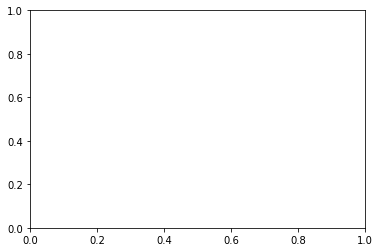

In [46]:
print(knn_acc)

import matplotlib.pyplot as plt
plt.plot(range(1, 32), knn_acc)
plt.xlabel('no. of features')
plt.ylabel('accuracy')
# plt.title('Pakistan India Population till 2010')
plt.show()

In [50]:
knn_acc= list()
for i in range(65, 97): 
    cols= featureScores.nlargest(i,'Score').Features  #print 10 best features
    X= data[cols]

    for col in X.keys():
        X[col].fillna(0, inplace=True)

    X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

    # Feature Scaling

    sc_X= StandardScaler()
    X_train= sc_X.fit_transform(X_train)
    X_test= sc_X.transform(X_test)

    knn_model.fit(X_train, y_train)

    knn_pred= knn_model.predict(X_test)
#     print(knn_pred)

#     knn_probs= knn_model.predict_proba(X_test)
#     print(knn_probs)

    # Accuracy Score

    knn_acc.append(accuracy_score(y_test, knn_pred))
#     print(knn_acc)

[0.8585247883917775, 0.8561064087061668, 0.8585247883917775, 0.8621523579201935, 0.8561064087061668, 0.8597339782345829, 0.8585247883917775, 0.8573155985489722, 0.8548972188633616, 0.8548972188633616, 0.8536880290205562, 0.8500604594921403, 0.8512696493349455, 0.8500604594921403, 0.8500604594921403, 0.8500604594921403, 0.848851269649335, 0.8512696493349455, 0.8536880290205562, 0.845223700120919, 0.8464328899637243, 0.848851269649335, 0.848851269649335, 0.845223700120919, 0.8464328899637243, 0.8476420798065296, 0.8464328899637243, 0.845223700120919, 0.848851269649335, 0.8440145102781137, 0.8464328899637243, 0.8428053204353083]


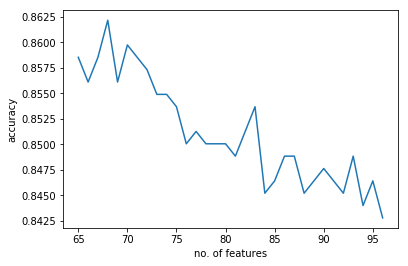

In [51]:
print(knn_acc)

import matplotlib.pyplot as plt
plt.plot(range(65, 97), knn_acc)
plt.xlabel('no. of features')
plt.ylabel('accuracy')
# plt.title('Pakistan India Population till 2010')
plt.show()

# K Means

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [53]:
cols= featureScores.nlargest(32,'Score').Features  #print 10 best features
X= data[cols]

for col in X.keys():
    X[col].fillna(0, inplace=True)

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

# Feature Scaling

sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

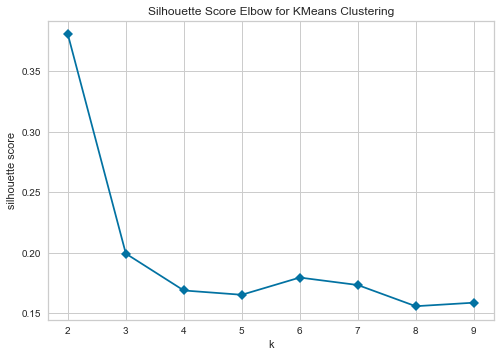

In [56]:
from yellowbrick.cluster import KElbowVisualizer

km_model= KMeans(random_state=0)

visualizer1= KElbowVisualizer(km_model, k=(2,10), metric='silhouette', timings= False)

visualizer1.fit(X_train)
visualizer1.poof()

In [60]:
kmeans= KMeans(random_state=0, n_clusters=2).fit(X_train)
labels= kmeans.labels_
# print(len(labels))

km_pred= kmeans.predict(X_test)

km_acc= accuracy_score(y_test, km_pred)
print(km_acc)

rf_conf= confusion_matrix(y_test, km_pred)
print(rf_conf)

0.32889963724304716
[[ 86 555]
 [  0 186]]
